In [309]:
import pyodbc 
import pandas as pd
import numpy as np

##importing the Visualisations
import matplotlib.pyplot as plt
from datetime import datetime as dt
from pandas import Series
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')


years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month


cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                        "Server=LAPTOP-KNCT3R7K;"
                        "Database=DBASQLADMIN;"
                      #  "uid=User;pwd=password")
                         "Trusted_Connection=yes;")
df = pd.read_sql_query("SELECT id, TimeStamp,ServerName ,UsedMb FROM [DBASQLADMIN].[dbo].[DiskSpaceChecks]  where servername ='1SQLRMS03' and vol ='D:' and timestamp > '2017-08-01'   and timestamp < '2018-10-30' order by 1 desc", cnxn)


#print(sd)

#df = pd.DataFrame(sd)

In [310]:
df.describe()

,id,UsedMb
count,416.000000,4.160000e+02
mean,79348.990385,1.365977e+07
std,39337.530594,1.648574e+06
min,8776.000000,9.467435e+06
25%,45503.500000,1.324902e+07
50%,80437.000000,1.414484e+07
75%,113333.000000,1.475688e+07
max,145885.000000,1.587435e+07


In [311]:
df.head(40)

,id,TimeStamp,ServerName,UsedMb
0,145885,2018-10-27 22:30:00,1SQLRMS03,14876396
1,145563,2018-10-26 22:30:00,1SQLRMS03,14872355
2,145241,2018-10-25 22:30:00,1SQLRMS03,14835674
3,144919,2018-10-24 22:30:00,1SQLRMS03,14805851
4,144597,2018-10-23 22:30:00,1SQLRMS03,14786334
5,144275,2018-10-22 22:30:00,1SQLRMS03,14754522
6,143953,2018-10-21 22:30:00,1SQLRMS03,14740510
7,143631,2018-10-20 22:30:00,1SQLRMS03,14740502
8,143309,2018-10-19 22:30:00,1SQLRMS03,14740502
9,142987,2018-10-18 22:30:00,1SQLRMS03,14727318


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 4 columns):
id            416 non-null int64
TimeStamp     416 non-null datetime64[ns]
ServerName    416 non-null object
UsedMb        416 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 13.1+ KB


In [313]:
#df.dropna(inplace =True)
df.drop(['ServerName','id'],inplace =True, axis=1)

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 2 columns):
TimeStamp    416 non-null datetime64[ns]
UsedMb       416 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.6 KB


In [315]:
#df['TimeStamp'] = pd.to_datetime(df.TimeStamp, format = '%Y-%m-%d %H:%M')
#df['TimeStamp'] = pd.to_datetime(df.TimeStamp, format = '%d-%m-%Y %H:%M')

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 2 columns):
TimeStamp    416 non-null datetime64[ns]
UsedMb       416 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.6 KB


In [317]:
df.head()

,TimeStamp,UsedMb
0,2018-10-27 22:30:00,14876396
1,2018-10-26 22:30:00,14872355
2,2018-10-25 22:30:00,14835674
3,2018-10-24 22:30:00,14805851
4,2018-10-23 22:30:00,14786334


In [318]:
for i in (df):
    df['year'] = df['TimeStamp'].dt.year
    df['month'] = df['TimeStamp'].dt.month
    df['day']= df['TimeStamp'].dt.day
    df['Hour']=df['TimeStamp'].dt.hour

In [319]:
df.head(10)

,TimeStamp,UsedMb,year,month,day,Hour
0,2018-10-27 22:30:00,14876396,2018,10,27,22
1,2018-10-26 22:30:00,14872355,2018,10,26,22
2,2018-10-25 22:30:00,14835674,2018,10,25,22
3,2018-10-24 22:30:00,14805851,2018,10,24,22
4,2018-10-23 22:30:00,14786334,2018,10,23,22
5,2018-10-22 22:30:00,14754522,2018,10,22,22
6,2018-10-21 22:30:00,14740510,2018,10,21,22
7,2018-10-20 22:30:00,14740502,2018,10,20,22
8,2018-10-19 22:30:00,14740502,2018,10,19,22
9,2018-10-18 22:30:00,14727318,2018,10,18,22


In [320]:
df.tail()

,TimeStamp,UsedMb,year,month,day,Hour
411,2017-09-04 09:26:00,9816117,2017,9,4,9
412,2017-09-04 09:14:00,9816117,2017,9,4,9
413,2017-09-02 08:37:00,9816117,2017,9,2,8
414,2017-08-30 09:10:00,9561397,2017,8,30,9
415,2017-08-29 16:06:00,9556696,2017,8,29,16


In [321]:
df['Day of week'] = df['TimeStamp'].dt.dayofweek

In [322]:
df.head()

,TimeStamp,UsedMb,year,month,day,Hour,Day of week
0,2018-10-27 22:30:00,14876396,2018,10,27,22,5
1,2018-10-26 22:30:00,14872355,2018,10,26,22,4
2,2018-10-25 22:30:00,14835674,2018,10,25,22,3
3,2018-10-24 22:30:00,14805851,2018,10,24,22,2
4,2018-10-23 22:30:00,14786334,2018,10,23,22,1


In [323]:
df['UsedMb'] = round((df['UsedMb']/1024)/1000,2)

In [324]:
df.head(20)

,TimeStamp,UsedMb,year,month,day,Hour,Day of week
0,2018-10-27 22:30:00,14.53,2018,10,27,22,5
1,2018-10-26 22:30:00,14.52,2018,10,26,22,4
2,2018-10-25 22:30:00,14.49,2018,10,25,22,3
3,2018-10-24 22:30:00,14.46,2018,10,24,22,2
4,2018-10-23 22:30:00,14.44,2018,10,23,22,1
5,2018-10-22 22:30:00,14.41,2018,10,22,22,0
6,2018-10-21 22:30:00,14.40,2018,10,21,22,6
7,2018-10-20 22:30:00,14.40,2018,10,20,22,5
8,2018-10-19 22:30:00,14.40,2018,10,19,22,4
9,2018-10-18 22:30:00,14.38,2018,10,18,22,3


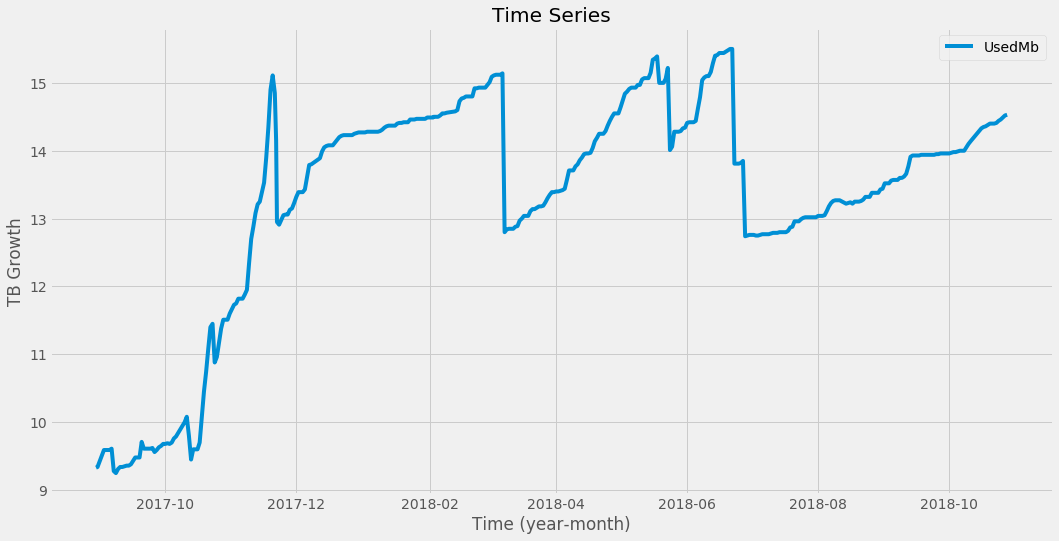

In [325]:
df.index = df['TimeStamp']
ts = df['UsedMb']
plt.figure(figsize = (16,8))
plt.plot(ts)
plt.title("Time Series")
plt.xlabel("Time (year-month)")
plt.ylabel("TB Growth")
plt.legend(loc = 'best')

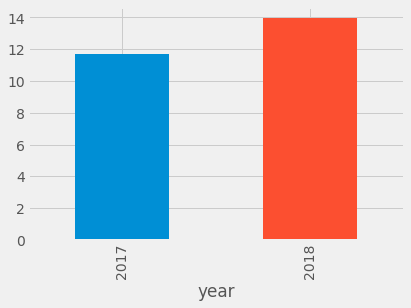

In [326]:
df.groupby('year')['UsedMb'].mean().plot.bar()

In [327]:
df['Rolling_Mean'] = df['UsedMb'].rolling(window = 30,min_periods=1).mean()  ##window will reduce outliers
df.head(5)

,TimeStamp,UsedMb,year,month,day,Hour,Day of week,Rolling_Mean
TimeStamp,,,,,,,,
2018-10-27 22:30:00,2018-10-27 22:30:00,14.53,2018,10,27,22,5,14.530000
2018-10-26 22:30:00,2018-10-26 22:30:00,14.52,2018,10,26,22,4,14.525000
2018-10-25 22:30:00,2018-10-25 22:30:00,14.49,2018,10,25,22,3,14.513333
2018-10-24 22:30:00,2018-10-24 22:30:00,14.46,2018,10,24,22,2,14.500000
2018-10-23 22:30:00,2018-10-23 22:30:00,14.44,2018,10,23,22,1,14.488000


In [328]:
df.isnull().sum()

TimeStamp       0
UsedMb          0
year            0
month           0
day             0
Hour            0
Day of week     0
Rolling_Mean    0
dtype: int64

In [329]:
print(df[df.Rolling_Mean.isnull()])

Empty DataFrame
Columns: [TimeStamp, UsedMb, year, month, day, Hour, Day of week, Rolling_Mean]
Index: []


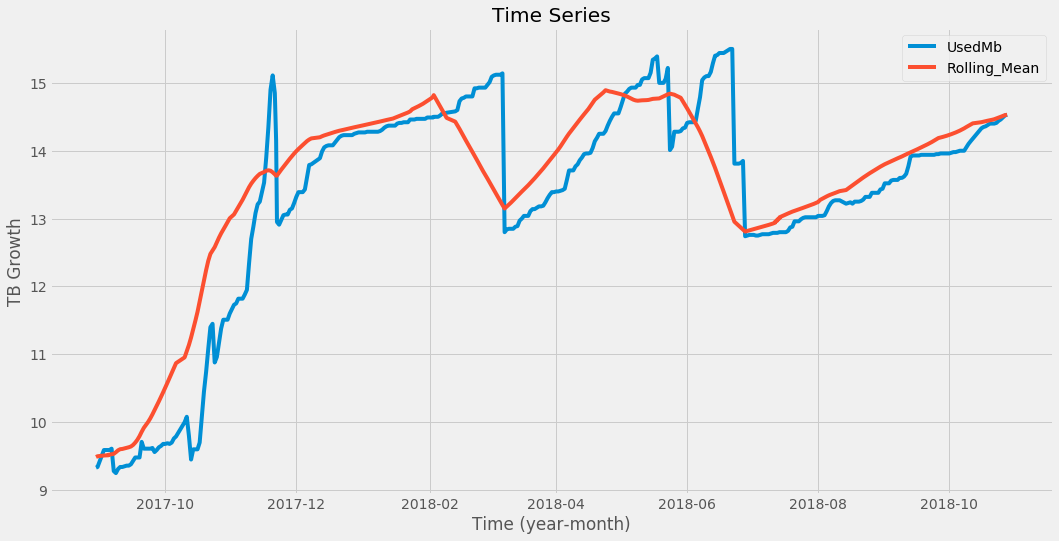

In [330]:
df.index = df['TimeStamp']
ts = df['UsedMb']
rm = df['Rolling_Mean']
plt.figure(figsize = (16,8))
plt.plot(ts)
plt.plot(rm)
plt.title("Time Series")
plt.xlabel("Time (year-month)")
plt.ylabel("TB Growth")
plt.legend(loc = 'best')

#### Divide data into training and validation

In [331]:
print(df['year'].loc['2001':'2017'])

Series([], Name: year, dtype: int64)


In [344]:
train = df[(df['TimeStamp'] > '2017-08-28') & (df['TimeStamp'] <= '2018-07-01')]
valid = df[(df['TimeStamp'] >= '2018-07-01') & (df['TimeStamp'] <= '2018-10-28')]

In [345]:
print(train.head())
print(valid.head())

                              TimeStamp  UsedMb  year  month  day  Hour  \
TimeStamp                                                                 
2018-06-30 22:30:00 2018-06-30 22:30:00   12.76  2018      6   30    22   
2018-06-29 22:30:00 2018-06-29 22:30:00   12.76  2018      6   29    22   
2018-06-28 22:30:00 2018-06-28 22:30:00   12.75  2018      6   28    22   
2018-06-27 22:30:00 2018-06-27 22:30:00   12.74  2018      6   27    22   
2018-06-26 22:30:00 2018-06-26 22:30:00   13.85  2018      6   26    22   

                     Day of week  Rolling_Mean  
TimeStamp                                       
2018-06-30 22:30:00            5     12.836000  
2018-06-29 22:30:00            4     12.827333  
2018-06-28 22:30:00            3     12.818333  
2018-06-27 22:30:00            2     12.809333  
2018-06-26 22:30:00            1     12.838000  
                              TimeStamp  UsedMb  year  month  day  Hour  \
TimeStamp                                               

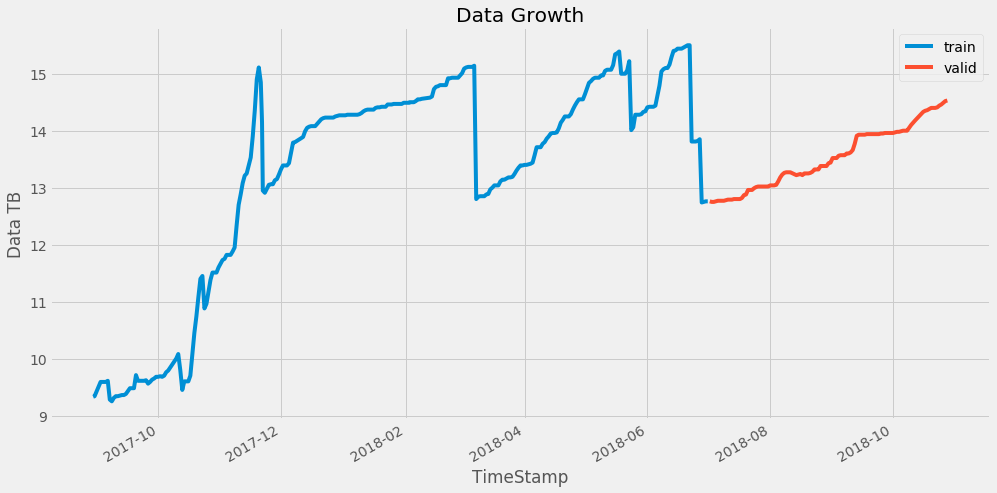

In [346]:
train.UsedMb.plot(figsize = (15,8), title = 'Data Growth', fontsize = 14, label = 'train')
valid.UsedMb.plot(figsize = (15,8), title = 'Data Growth', fontsize =14, label = 'valid')
plt.xlabel('TimeStamp')
plt.ylabel('Data TB')
plt.legend(loc = 'best')

Text(0.5,1,'Naive Forecast')

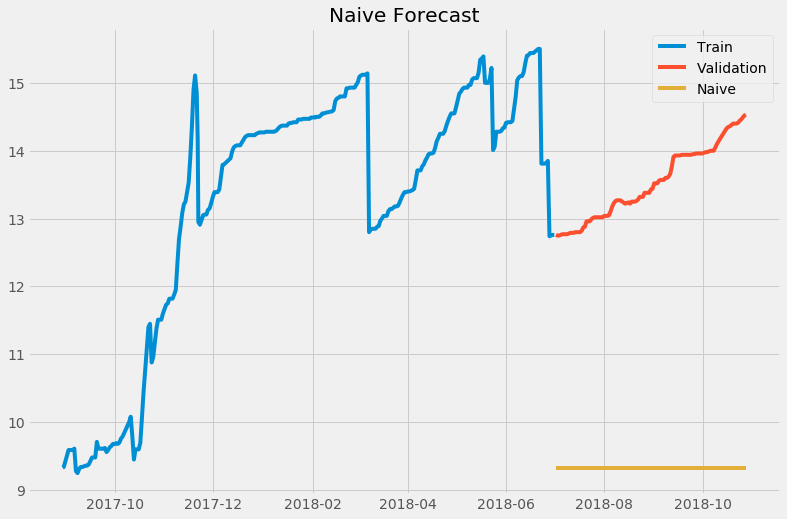

In [347]:
dd = np.asarray(train.UsedMb)
y_hat =valid.copy()
y_hat['naive']= dd[len(dd)- 1]
plt.figure(figsize = (12,8))
plt.plot(train.index, train['UsedMb'],label = 'Train')
plt.plot(valid.index, valid['UsedMb'], label = 'Validation')
plt.plot(y_hat.index, y_hat['naive'],  label = 'Naive')
plt.legend(loc = 'best')
plt.title('Naive Forecast')

In [348]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(valid.UsedMb, y_hat.naive))
rmse

4.192969701208707

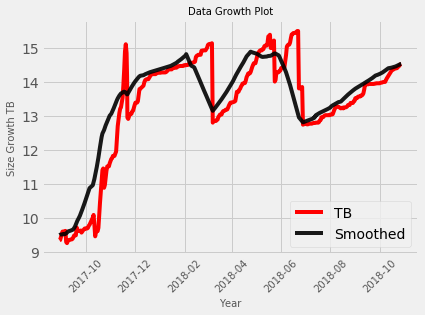

In [349]:
# Almost exactly the code as above but with datetime
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(df['TimeStamp'], df['UsedMb'] ,color = (1,0,0), label = 'TB');
ax.plot(df['TimeStamp'], df['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed');
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Size Growth TB', fontsize=10)
ax.legend(loc='lower right');
plt.xticks(rotation=45, fontsize=10)
plt.title('Data Growth Plot', fontsize=10)
plt.show()


In [338]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(valid.UsedMb, y_hat.naive))
rmse

4.192969701208707

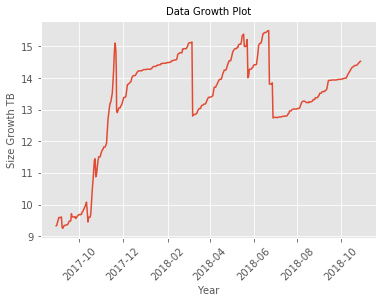

In [97]:
fig = plt.figure();
ax = fig.add_subplot(111);
#ax.set_xticklabels(df['Month'])
ax.plot(df['Month'], df['UsedMb'])  ##draws the plot
plt.xlabel('Year', fontsize=10); ##sets the x label
plt.ylabel('Size Growth TB', fontsize=10);  ##sets the y label
plt.title('Data Growth Plot', fontsize=10)
#plt.xticks(rotation=45)
plt.xticks(rotation=45, fontsize=10)
plt.show()

C:\Users\tulls\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """Entry point for launching an IPython kernel.


AttributeError: 'float' object has no attribute 'toordinal'

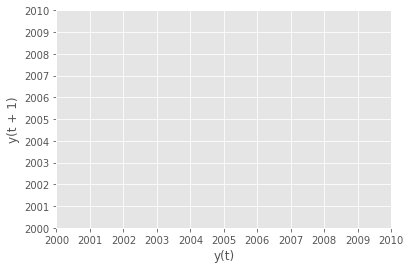

In [101]:
lag_plot(df)
pyplot.show()

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
model = LinearRegression().fit(df[['Month']], df[['Rolling_Mean']])
m = model.coef_[0]
b = model.intercept_
#equation of the line
print ('y = ', round(m[0],2), 'x + ', round(b[0],2))

y =  0.0 x +  -83.6


In [100]:
# using the equation of the line to get y values
predictions = model.predict(df[['Month']])
predictions[0:5]

TypeError: Cannot cast array data from dtype('<M8[ns]') to dtype('float64') according to the rule 'safe'

In [69]:
from pandas.tools.plotting import lag_plot

In [71]:
lag_plot(df['Month'], df['UsedMb'])
pyplot.show()

C:\Users\tulls\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """Entry point for launching an IPython kernel.


TypeError: slice indices must be integers or None or have an __index__ method

In [72]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

moving_average(ads, 24) # prediction for the last observed day (past 24 hours)

moving_average(Rolling_Mean)

NameError: name 'ads' is not defined